In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./heart disease classification dataset.csv')
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df = df.drop('Unnamed: 0',axis=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,male,0,150.0,276.0,0,0,112.0,1,0.6,1,1,1,no
1,59,male,3,170.0,288.0,0,0,159.0,0,0.2,1,0,3,no
2,57,male,2,150.0,126.0,1,1,173.0,0,0.2,2,1,3,yes
3,56,female,0,134.0,409.0,0,0,150.0,1,1.9,1,2,3,no
4,71,female,2,110.0,265.0,1,0,130.0,0,0.0,2,1,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,50,male,2,140.0,233.0,0,1,163.0,0,0.6,1,1,3,no
299,51,male,2,94.0,227.0,0,1,154.0,1,0.0,2,1,3,yes
300,69,male,3,160.0,234.0,1,0,131.0,0,0.1,1,1,2,yes
301,46,male,0,120.0,249.0,0,0,144.0,0,0.8,2,0,3,no


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.00,77.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.00,3.0
trestbps,299.0,131.712375,17.629032,94.0,120.0,130.0,140.00,200.0
chol,302.0,246.317881,51.908285,126.0,211.0,240.5,274.75,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.00,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.00,2.0
thalach,298.0,149.865772,22.563687,71.0,134.5,152.5,166.00,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.00,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.60,6.2
slope,303.0,1.399340,0.616226,0.0,1.0,1.0,2.00,2.0


In [4]:
df = df.dropna()

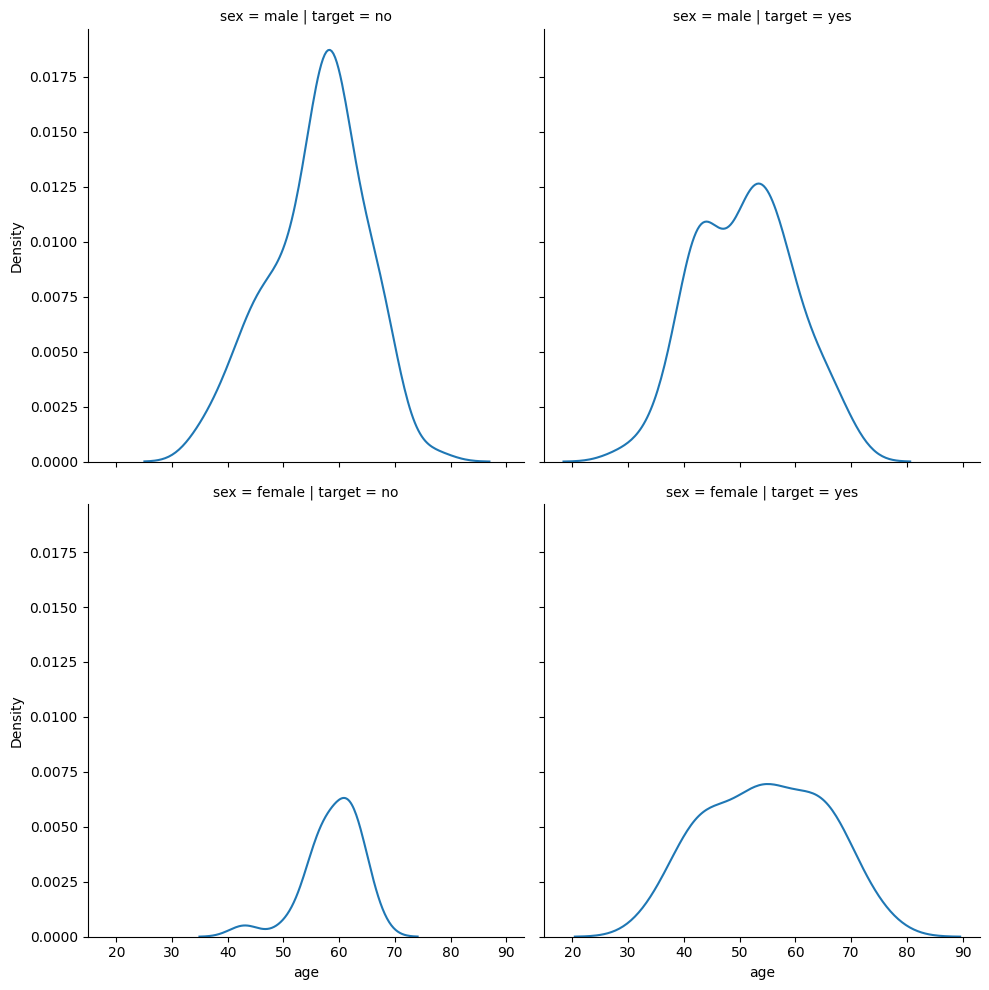

In [5]:
sns.displot(data=df, x='age',kind='kde',col='target',row='sex')

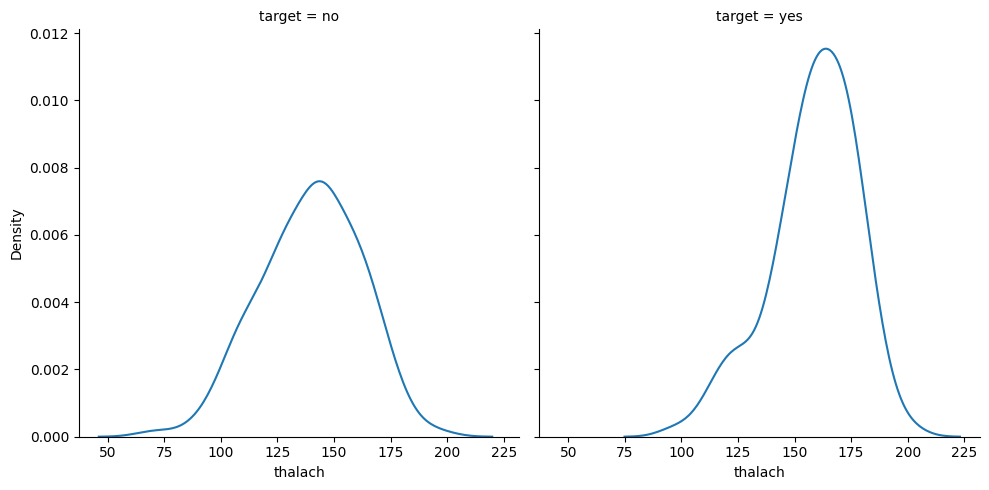

In [6]:
sns.displot(data=df, x='thalach',kind='kde',col='target')

## FEATURE IMPORTANCE

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [8]:
label = LabelEncoder()

In [9]:
df['target'] = label.fit_transform(df['target'])
df['sex'] = label.fit_transform(df['sex'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_7992\2332073274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = label.fit_transform(df['target'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_7992\2332073274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = label.fit_transform(df['sex'])


In [10]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df['target']

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
model = LogisticRegression()


In [13]:
model.fit(X,y)

C:\Users\DELL\anaconda3\envs\Vision\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
importance = pd.Series(model.coef_[0],index=X.columns)
print(importance)

age         0.015129
sex        -1.156188
cp          0.799668
trestbps   -0.014735
chol       -0.001531
fbs        -0.124484
restecg     0.623574
thalach     0.028806
exang      -0.819886
oldpeak    -0.598188
slope       0.518554
ca         -0.741180
thal       -1.007994
dtype: float64


<Axes: >

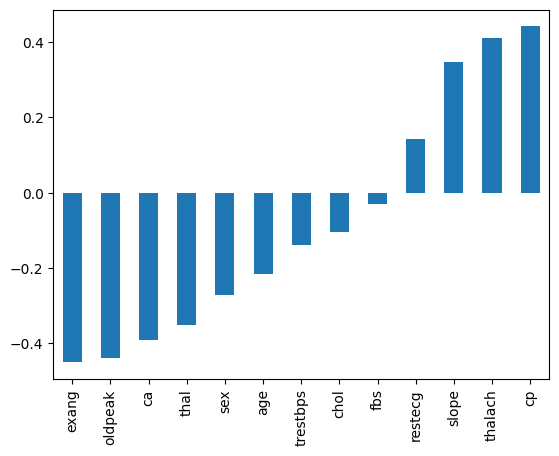

In [15]:
df.corr()['target'][:-1].sort_values().plot(kind='bar')

<Axes: >

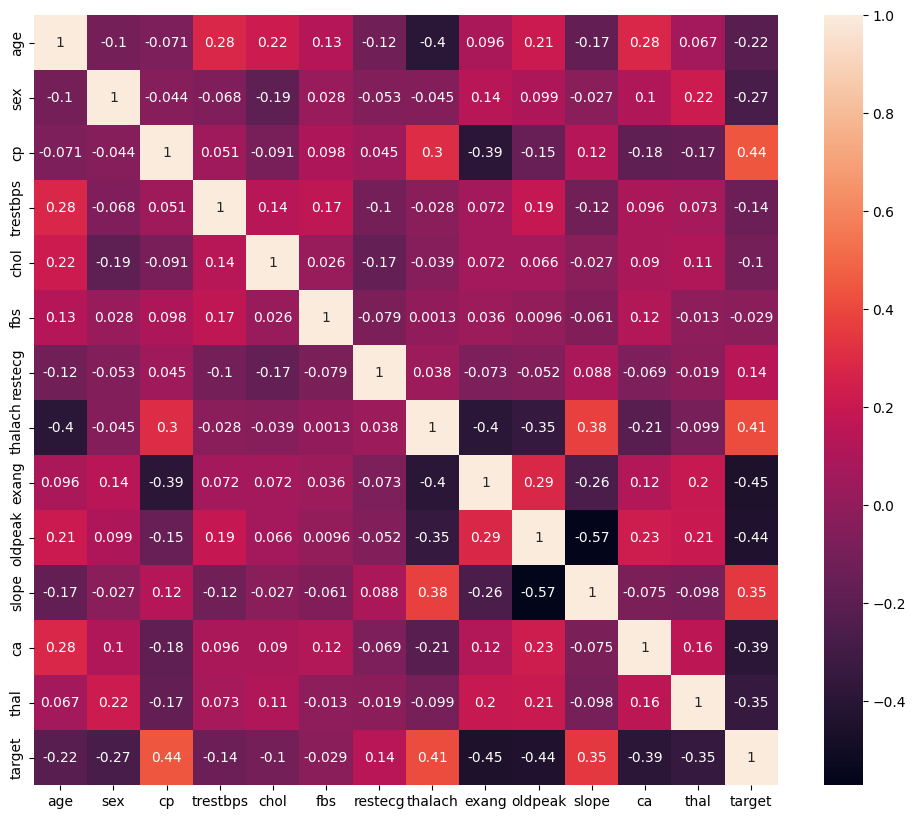

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df.corr(), annot=True)

In [17]:
df = df.drop(columns=['trestbps','thalach','chol','fbs','age'])


In [18]:
df

,sex,cp,restecg,exang,oldpeak,slope,ca,thal,target
0,1,0,0,1,0.6,1,1,1,0
1,1,3,0,0,0.2,1,0,3,0
2,1,2,1,0,0.2,2,1,3,1
3,0,0,0,1,1.9,1,2,3,0
4,0,2,0,0,0.0,2,1,2,1
...,...,...,...,...,...,...,...,...,...
298,1,2,1,0,0.6,1,1,3,0
299,1,2,1,1,0.0,2,1,3,1
300,1,3,0,0,0.1,1,1,2,1
301,1,0,0,0,0.8,2,0,3,0


In [19]:
X= df.drop('target',axis=1).values
y=df['target'].values

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101) 

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
scaler.fit(X_train)

MinMaxScaler()

In [39]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from tensorflow.keras.models import Sequential

In [41]:
from tensorflow.keras.layers import Dense, Dropout

In [42]:
X_train.shape

(219, 8)

In [127]:
model = Sequential()

# model.add(Dense(26, activation='relu'))
# model.add(Dense(38, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(6,activation='relu'))

#binary classification
model.add(Dense(1))

model.compile(loss='binary_crossentropy',optimizer='adam')


In [128]:
model.fit(x=X_train,y=y_train,epochs=500,validation_data=(X_test,y_test))

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.9476 - val_loss: 0.6721
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7086 - val_loss: 0.6436
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6905 - val_loss: 0.6001
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6390 - val_loss: 0.6078
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6790 - val_loss: 0.6115
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6531 - val_loss: 0.5968
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6037 - val_loss: 0.5698
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5888 - val_loss: 0.5369
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5612 - val_loss: 0.5080
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5451 - val_loss: 0.4869
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5052 - val_loss: 0.4699
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4905 - val_lo

In [129]:
losses = pd.DataFrame(model.history.history)

<Axes: >

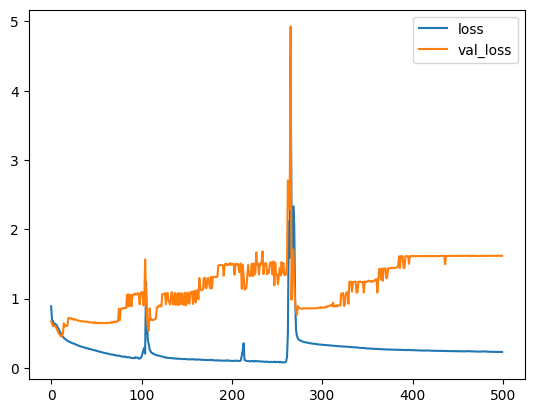

In [130]:
losses.plot()

In [119]:
model.evaluate(X_test,y_test,verbose=0)

0.16728845238685608

In [120]:
model.evaluate(X_train,y_train,verbose=0)

0.019193459302186966

In [121]:
predictions = model.predict(X_test)
predictions

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[-6.82222694e-02],
       [ 8.18206906e-01],
       [ 9.65083122e-01],
       [-2.68596523e-02],
       [ 1.01377237e+00],
       [ 9.66048777e-01],
       [ 9.52507257e-01],
       [ 1.00965369e+00],
       [-3.46801691e-02],
       [ 9.13714647e-01],
       [ 6.36686981e-02],
       [ 1.19920611e-01],
       [ 9.58737731e-01],
       [ 1.01887941e+00],
       [-3.02765481e-02],
       [ 9.80336666e-02],
       [ 9.52507257e-01],
       [ 1.02995718e+00],
       [ 1.78025700e-02],
       [-8.89644921e-02],
       [ 3.28415036e-01],
       [-3.53824720e-03],
       [ 1.02949440e+00],
       [ 9.65083122e-01],
       [-4.76911478e-02],
       [-1.49342827e-02],
       [ 4.69875708e-03],
       [ 6.42510056e-01],
       [ 1.02995718e+00],
       [ 9.78968978e-01],
       [ 9.26711440e-01],
       [ 9.04260695e-01],
       [ 4.81996126e-02],
       [ 1.43643320e-01],
       [ 3.32355537e-02],
       [ 9.10686433e-01],
       [ 8.50554883e-01],
       [ 1.02512574e+00],
       [ 9.6

In [122]:
from sklearn.metrics import r2_score,accuracy_score,mean_absolute_error

In [123]:
mean_absolute_error(y_test,predictions) 

0.22497488830137896

In [124]:
from sklearn.metrics import explained_variance_score

In [125]:
explained_variance_score(y_test,predictions) 

0.33777011078251185

In [126]:
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
classification_report(y_test,predictions)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [37]:
# model = Sequential()

# model.add(Dense(46, activation='relu'))
# model.add(Dense(38, activation='relu'))
# model.add(Dense(32,activation='relu'))
# model.add(Dense(26,activation='relu'))
# model.add(Dense(18,activation='relu'))
# model.add(Dense(13,activation='relu'))

# #binary classification
# model.add(Dense(1,activation='sigmoid'))

# model.compile(loss='binary_crossentropy',optimizer='adam')


In [38]:
# from tensorflow.keras.callbacks import EarlyStopping

In [40]:
# help(EarlyStopping)

Help on class EarlyStopping in module keras.src.callbacks.early_stopping:

class EarlyStopping(keras.src.callbacks.callback.Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |      monitor: Quantity to be monitored. Defaults 

In [42]:
# early_stop = EarlyStopping(monitor='loss', mode=max,verbose=1,patience=25)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11716\358457668.py:1: UserWarning: EarlyStopping mode <built-in function max> is unknown, fallback to auto mode.
  early_stop = EarlyStopping(monitor='loss', mode=max,verbose=1,patience=25)


In [44]:
# model.fit(x=X_train,y=y_train,epochs=700,validation_data=(X_test,y_test),
#          callbacks=[early_stop])

Epoch 1/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.6923 - val_loss: 0.6944
Epoch 2/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6914 - val_loss: 0.6957
Epoch 3/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6894 - val_loss: 0.6974
Epoch 4/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6882 - val_loss: 0.6995
Epoch 5/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6824 - val_loss: 0.7027
Epoch 6/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6926 - val_loss: 0.7059
Epoch 7/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6880 - val_loss: 0.7097
Epoch 8/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6803 - val_loss: 0.7152
Epoch 9/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6781 - val_loss: 0.7201
Epoch 10/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6942 - val_loss: 0.7232
Epoch 11/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6830 - val_loss: 0.7224
Epoch 12/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6833 - val_loss:

In [45]:
# new = pd.DataFrame(model.history.history)

<Axes: >

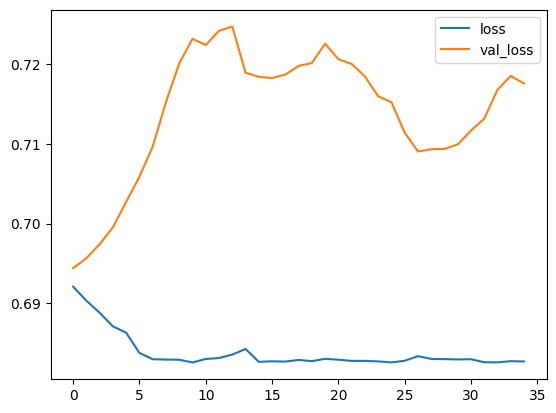

In [46]:
# new.plot()

In [47]:
# pred2 = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [48]:
# mean_absolute_error(y_test,pred2) 

0.5061071311172686

In [49]:
# r2_score(y_test,pred2)

-0.054940223693847656

In [50]:
# explained_variance_score(y_test,predictions) 

0.0

In [51]:
# model = Sequential()

# model.add(Dense(46, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(38, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(26,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(18,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(13,activation='relu'))
# model.add(Dropout(0.2))

# #binary classification
# model.add(Dense(1,activation='sigmoid'))

# model.compile(loss='binary_crossentropy',optimizer='adam')


In [52]:
# model.fit(x=X_train,y=y_train,epochs=700,validation_data=(X_test,y_test),
#          callbacks=[early_stop])

Epoch 1/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.6966 - val_loss: 0.6940
Epoch 2/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6923 - val_loss: 0.6946
Epoch 3/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6917 - val_loss: 0.6952
Epoch 4/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6908 - val_loss: 0.6961
Epoch 5/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6882 - val_loss: 0.6973
Epoch 6/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6839 - val_loss: 0.6989
Epoch 7/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6900 - val_loss: 0.6998
Epoch 8/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6846 - val_loss: 0.7012
Epoch 9/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6899 - val_loss: 0.7019
Epoch 10/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6880 - val_loss: 0.7022
Epoch 11/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6810 - val_loss: 0.7037
Epoch 12/700
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6835 - val_loss

In [53]:
# second = pd.DataFrame(model.history.history)

<Axes: >

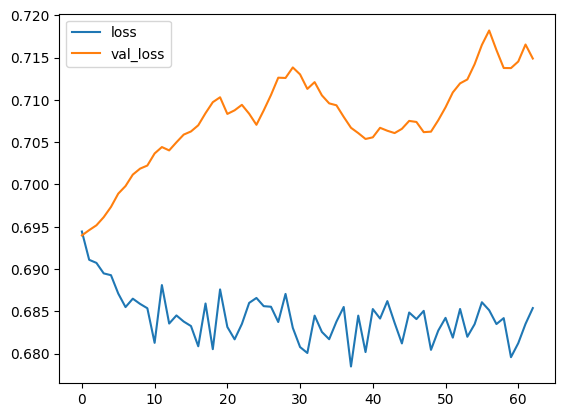

In [54]:
# second.plot()

In [57]:
# pred3 = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [58]:
# mean_absolute_error(y_test,pred3) 

0.5056510191214713

In [59]:
# from sklearn.metrics import classification_report, confusion_matrix

In [61]:
# confusion_matrix(y_test,pred3)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [62]:
# explained_variance_score(y_test,pred3) 

0.0

In [63]:
# r2_score(y_test,pred3)

-0.04964101314544678